# Part 3: Logarithmic plots

### Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from math import radians, cos, sin, asin, sqrt

### Importing the Crime Data

In [2]:
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

### Haversine Formula

In [3]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

### Remove Outliers (Coordinates) from the Data

In [4]:
data = data[(data['Y'] < 50) & (data['X'] < -122)]

### Estimate the Bins

In [5]:
lat_min = data['Y'].min()
lat_max = data['Y'].max()
lon_min = data['X'].min()
lon_max = data['X'].max()

print(f"Estimated bin amount along the western border of San Fransisco: {haversine(lon_min, lat_min, lon_min, lat_max)*10}") 
print(f"Estimated bin amount along the eastern border of San Fransisco: {haversine(lon_max, lat_min, lon_max, lat_max)*10}")

print(f"Estimated bin amount along the northern border of San Fransisco: {haversine(lon_min, lat_max, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the southern border of San Fransisco: {haversine(lon_min, lat_min, lon_max, lat_min)*10}")

Estimated bin amount along the western border of San Fransisco: 125.36317921721854
Estimated bin amount along the eastern border of San Fransisco: 125.36317921721854
Estimated bin amount along the northern border of San Fransisco: 130.78123566673804
Estimated bin amount along the southern border of San Fransisco: 130.9807444161078


### Divide San Francisco into a grid roughly $100m \times 100m$

In [6]:
count, lon, lat = np.histogram2d(data.Y, data.X, bins = [130,125])

### Count the number of thefts occurring within each grid-square 

In [7]:
coordinates = data[['X', 'Y']]

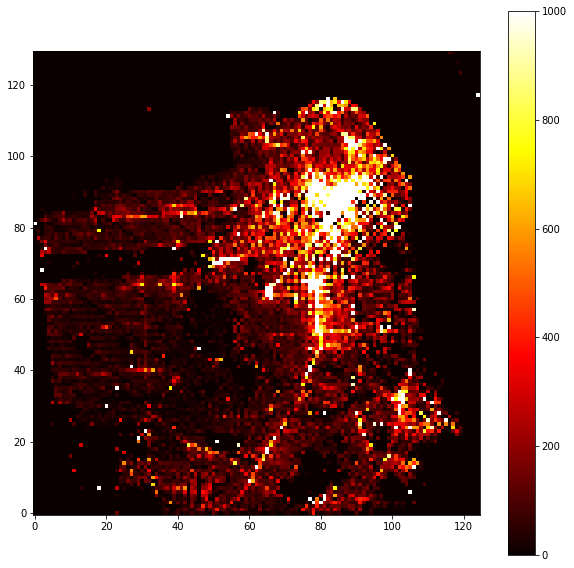

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot',vmax=1000, origin='lower')
plt.colorbar()

In [9]:
data['Category'].unique()

array(['LARCENY/THEFT', 'OTHER OFFENSES', 'VEHICLE THEFT', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'ASSAULT', 'NON-CRIMINAL', 'BURGLARY',
       'LOITERING', 'ROBBERY', 'SUSPICIOUS OCC', 'FORGERY/COUNTERFEITING',
       'DRUG/NARCOTIC', 'TRESPASS', 'VANDALISM', 'WARRANTS',
       'SECONDARY CODES', 'WEAPON LAWS', 'MISSING PERSON', 'DRUNKENNESS',
       'STOLEN PROPERTY', 'RECOVERED VEHICLE', 'PROSTITUTION', 'ARSON',
       'EMBEZZLEMENT', 'LIQUOR LAWS', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING', 'SUICIDE', 'BRIBERY',
       'FAMILY OFFENSES', 'SEX OFFENSES, NON FORCIBLE', 'BAD CHECKS',
       'GAMBLING', 'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'TREA'],
      dtype=object)